## Observations and Insights 

* Observation One     
  - Capomulin is less effective on heavier mice, based on the scatter plot below.
      - r-value of 0.95 is a strong correlation
     
* Observation Two
  - Capomulin and Ramicane are more effective than Ceftamin and Infubinol.
      - based on my boxplot below
  
* Observation Three
  - Capomulin and Ramicane also produced the greatest number of Timpoints.
      - based on bar charts below

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
print(mouse_metadata.head())
print(study_results.head())
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
df

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
total_mice = len(df["Mouse ID"].unique())
print(f'Total number of mice: {total_mice}')

Total number of mice: 249


In [3]:
# Getting the duplicate entries by mouse ID number that show up for Mouse ID and Timepoint.
# using duplicated() method and finding duplicates of Mouse ID with the same Timepoint and storing 
duplicates_mouse_id = df[df.duplicated(["Mouse ID", "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_mouse_id

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# using drop_duplicates() method on subset mouse id and timepoint storing as clean_df
clean_df = df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df_total_mice = len(clean_df["Mouse ID"].unique())
print(f'Total number of mice in clean dataframe: {clean_df_total_mice}')

Total number of mice in clean dataframe: 249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Make copy of clean df
copy1 = clean_df.copy()

# Drug Regimen values
print(copy1["Drug Regimen"].unique())


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

# Using groupby method with numpy and scipy stats to calculate
reg_group = copy1.groupby(["Drug Regimen"])
mean_regimen_tumor_volume = reg_group['Tumor Volume (mm3)'].mean()
median_regimen_tumor_volume = reg_group['Tumor Volume (mm3)'].median()
variance_regimen_tumor_volume = reg_group['Tumor Volume (mm3)'].var()
standard_deviation_regimen_tumor = reg_group['Tumor Volume (mm3)'].std()
sem_regimen_tumor_volume = reg_group['Tumor Volume (mm3)'].sem()

# checking groups
print(mean_regimen_tumor_volume)
print(median_regimen_tumor_volume)
print(variance_regimen_tumor_volume)
print(standard_deviation_regimen_tumor)
print(sem_regimen_tumor_volume)

# Assemble the resulting series into a single summary dataframe.
summary_groups = pd.DataFrame({"Mean": mean_regimen_tumor_volume,
                              "Median": median_regimen_tumor_volume,
                              "Variance": variance_regimen_tumor_volume,
                              "Standard Deviation": standard_deviation_regimen_tumor,
                              "Sem": sem_regimen_tumor_volume})
summary_groups

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.382993
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.783528
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.220205
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    4.99477

,Mean,Median,Variance,Standard Deviation,Sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

# Using groupby method and agg method with numpy and scipy stats to calculate

drug_regimen_summary_table = copy1.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg([np.mean, np.median, np.var, np.std, st.sem])

drug_regimen_summary_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

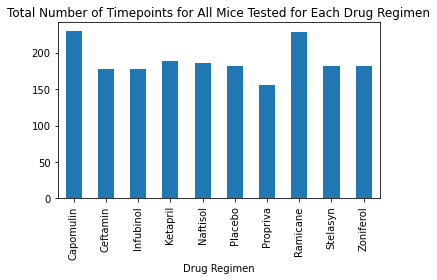

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# Using DataFrame.plot() method

# create new data fram with drug regimen and timepoint
reduced_df = copy1[['Drug Regimen', 'Timepoint']]
# group by drug regimen and use sum to get total number of timepoints for each drug regimen
timepoint_group = reduced_df.groupby(['Drug Regimen'])
total_number_timepoints = timepoint_group['Timepoint'].count()
# using .plot()
chart1 = total_number_timepoints.plot(kind='bar', figsize=(6,4))

# adding title
plt.title("Total Number of Timepoints for All Mice Tested for Each Drug Regimen")

# applying tight layout
plt.tight_layout()

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')


Text(0, 0.5, 'Total Number of Timepoints')

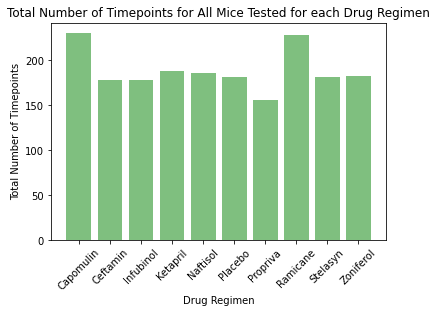

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# Using pyplot method

# x-axis
x_axis = np.arange(len(total_number_timepoints))

# checking values for x-ticks
print(total_number_timepoints.index)

# tick locations
tick_locations = [value for value in x_axis]

# plt.bar
plt.bar(x_axis, total_number_timepoints, color='green', alpha=0.5)

# plt.xticks
plt.xticks(tick_locations, total_number_timepoints.index, rotation=45)

# title and x and y labels
plt.title("Total Number of Timepoints for All Mice Tested for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")

Male      125
Female    124
Name: Sex, dtype: int64
Index(['Male', 'Female'], dtype='object')


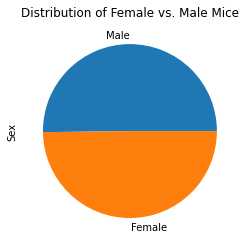

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Making copy of mouse meta data
mouse_copy = mouse_metadata.copy()

# reducing
mousedata_reduced_for_pie = mouse_copy[['Mouse ID', 'Sex']]

# calculating total number of mice for each sex
number_male_female = mousedata_reduced_for_pie['Sex'].value_counts()

# test
print(number_male_female)

# checking index
print(number_male_female.index)

# pie chart using .plot
male_female_pie_chart = number_male_female.plot(kind='pie', y='Sex', title="Distribution of Female vs. Male Mice")


Male      125
Female    124
Name: Sex, dtype: int64


(-1.1159511606661825,
 1.1225755905120671,
 -1.117535814763446,
 1.1215313221959569)

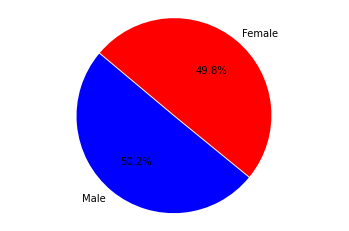

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# using reduced data frame from above to get values
print(number_male_female)
sex = ["Male", "Female"]
totals = [125, 124]
colors = ['blue', 'red']
explode = (0.01, 0)

# matplotlib create pie chart
plt.pie(totals, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", startangle=140)

# equal axis for perfect circle
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# using copy1 of clean_df
# using .loc with the specific drug regimen
# Start by getting the last (greatest) timepoint for each mouse

# Capomulin
capomulin = copy1.loc[copy1['Drug Regimen'] == "Capomulin"]
cap_last_timepoint_mouse = capomulin.groupby('Mouse ID')['Timepoint'].max()
print(len(cap_last_timepoint_mouse))

# Ramicane
ramicane = copy1.loc[copy1['Drug Regimen'] == "Ramicane"]
ram_last_timepoint_mouse = ramicane.groupby('Mouse ID')['Timepoint'].max()
print(len(ram_last_timepoint_mouse))

# Infubinol
infubinol = copy1.loc[copy1['Drug Regimen'] == "Infubinol"]
inf_last_timepoint_mouse = infubinol.groupby('Mouse ID')['Timepoint'].max()
print(len(inf_last_timepoint_mouse))

# Ceftamin
ceftamin = copy1.loc[copy1['Drug Regimen'] == "Ceftamin"]
ceft_last_timepoint_mouse = ceftamin.groupby('Mouse ID')['Timepoint'].max()
print(len(ceft_last_timepoint_mouse))

# Using .loc with multiple or conditions for each specific regimen
specific_drug_regimen = copy1.loc[((copy1['Drug Regimen'] == "Capomulin") | (copy1['Drug Regimen'] == "Ramicane") | (copy1['Drug Regimen'] == "Infubinol") | (copy1['Drug Regimen'] == "Ceftamin"))]

# Checked length of each specifc Drug Regimen group to validate that they add up to the same length as the group with multiple Regimens
# By printing length of Each of the above Drug Regimens by Mouse ID and max timepoint and the group of Regimens by mouse ID and max timepoint
# 25 + 25 + 25 + 25 = 100
print(len(specific_drug_regimen.groupby('Mouse ID')['Timepoint'].max()))

# using above DataFrame Groupby (Drug Regimen and Mouse ID and the index max of the Timepoint column) and reset the index
# tested by printing length of the new group data frame
max_timepoint_tumor_volume = specific_drug_regimen.loc[specific_drug_regimen.groupby(['Drug Regimen', 'Mouse ID'])['Timepoint'].idxmax()].reset_index(drop=True)
print(len(max_timepoint_tumor_volume))
print(max_timepoint_tumor_volume.columns)
max_timepoint_tumor_volume

25
25
25
25
100
100
Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,45,38.982878,2
1,b742,Capomulin,Male,7,21,45,38.939633,0
2,f966,Capomulin,Male,16,17,20,30.485985,0
3,g288,Capomulin,Male,3,19,45,37.074024,1
4,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
95,s508,Ramicane,Male,1,17,45,30.276232,0
96,u196,Ramicane,Male,18,25,45,40.667713,3
97,w678,Ramicane,Female,5,24,5,43.166373,0
98,y449,Ramicane,Male,19,24,15,44.183451,0


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
print(max_timepoint_tumor_volume['Drug Regimen'].unique())

treatments_list = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# using for loop to loop through treatments (Drug Regimen)
for treatment in treatments_list:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_on_drug = max_timepoint_tumor_volume.loc[max_timepoint_tumor_volume['Drug Regimen'] == treatment]
    tumor_volume = mice_on_drug["Tumor Volume (mm3)"]
    tumor_volume_data_list.append(tumor_volume)
    
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"IQR for {treatment} is {iqr}")
    
    # Upper and lower bound for indentifying outliers for each treatment
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"LOWER BOUND for {treatment} is {lower_bound}")
    print(f"UPPER BOUND for {treatment} is {upper_bound}")
    
    # Checking for outliers
    outliers = tumor_volume.loc[(mice_on_drug['Tumor Volume (mm3)'] >= upper_bound) | (mice_on_drug['Tumor Volume (mm3)'] <= lower_bound)].count()
    print(f"Number of {treatment} outliers is {outliers}")

['Capomulin' 'Ceftamin' 'Infubinol' 'Ramicane']
IQR for Capomulin is 7.781863460000004
LOWER BOUND for Capomulin is 20.70456164999999
UPPER BOUND for Capomulin is 51.83201549
Number of Capomulin outliers is 0
IQR for Ceftamin is 15.577752179999997
LOWER BOUND for Ceftamin is 25.355449580000002
UPPER BOUND for Ceftamin is 87.66645829999999
Number of Ceftamin outliers is 0
IQR for Infubinol is 11.477135160000003
LOWER BOUND for Infubinol is 36.83290494999999
UPPER BOUND for Infubinol is 82.74144559000001
Number of Infubinol outliers is 1
IQR for Ramicane is 9.098536719999998
LOWER BOUND for Ramicane is 17.912664470000003
UPPER BOUND for Ramicane is 54.30681135
Number of Ramicane outliers is 0


([<matplotlib.axis.XTick at 0x1afcbcc0f08>,
 [Text(0, 0, 'Capomulin'),
  Text(0, 0, 'Ceftamin'),
  Text(0, 0, 'Infubinol'),
  Text(0, 0, 'Ramicane')])

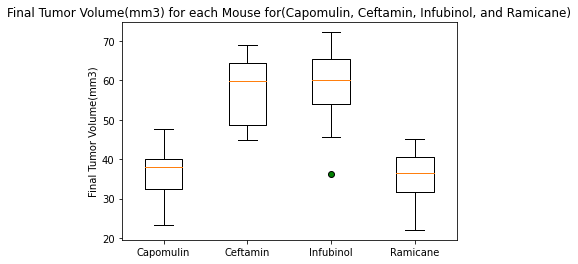

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# plt.boxplot
plt.boxplot(tumor_volume_data_list, flierprops={'marker': 'o', 'markerfacecolor': 'green'})

# titles labels and xticks
plt.title("Final Tumor Volume(mm3) for each Mouse for(Capomulin, Ceftamin, Infubinol, and Ramicane)")
plt.ylabel("Final Tumor Volume(mm3)")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"])

## Line and Scatter Plots

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

Text(0, 0.5, 'Tumor Volume (mm3)')

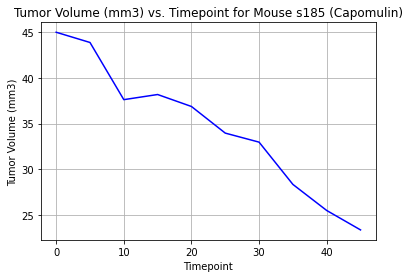

In [16]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
print(capomulin)
mouse_s185 = copy1.loc[copy1['Mouse ID'] == 's185']
mouse_s185
plt.plot(mouse_s185['Timepoint'], mouse_s185['Tumor Volume (mm3)'], color='blue', label='s185')
plt.grid()
plt.title("Tumor Volume (mm3) vs. Timepoint for Mouse s185 (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

Text(0, 0.5, 'Average Tumor Volume (mm3)')

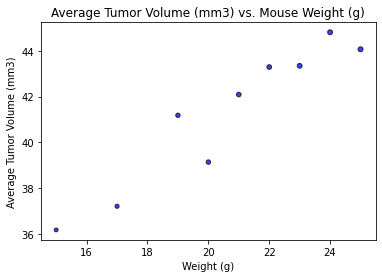

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_group_average_tumor_volume = capomulin.groupby('Weight (g)')['Tumor Volume (mm3)'].mean()
weights_capomulin = weight_group_average_tumor_volume.index
plt.scatter(weights_capomulin, weight_group_average_tumor_volume, marker='o', facecolors='blue', edgecolors='black', s=weights_capomulin, alpha=0.75)
plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# 'mt' stands for mass tumor
x = weights_capomulin
y = weight_group_average_tumor_volume
mt_slope, mt_int, mt_r, mt_p, mt_std_err = st.linregress(x, y)

# equation
# mt_fit regression values
mt_fit = mt_slope * x + mt_int
slope_eq = round(mt_slope,2)
intercept_eq = round(mt_int,2)
lin_eq = f'y = {slope_eq}x + {intercept_eq}'
print(f'Linear Regression Equation is {lin_eq}')

# correlation coefficient using pearsonr
correlation = st.pearsonr(x,y)
print(f'The Correlation between weight and Tumor Volume for Mice on the Capomulin Regimen is {correlation[0]}')

Linear Regression Equation is y = 0.89x + 22.76
The Correlation between weight and Tumor Volume for Mice on the Capomulin Regimen is 0.9505243961855269


Text(22, 38, 'y = 0.89x + 22.76')

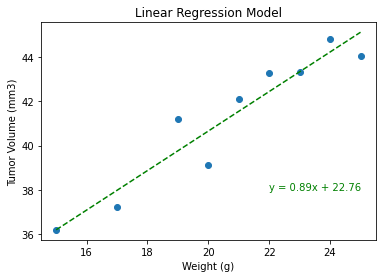

In [19]:
# Plotting Regression
plt.scatter(x, y)
plt.plot(x, mt_fit, "g--")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Linear Regression Model")
plt.annotate(lin_eq, (22,38), fontsize=10,color='green')